In [1]:
# Clear workspace
rm(list=ls())

In [2]:
# Garabage collect to help prevent memory issues
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,610803,32.7,1320457,70.6,1228879,65.7
Vcells,1141722,8.8,8388608,64.0,1821309,13.9


In [3]:
# Uncomment and run to install packages if needed
# install.packages("lubridate")
# install.packages("tidyverse")
# install.packages("timetk")
# install.packages("ggridges")

In [4]:
# Load libraries
library(tidyverse)
library(lubridate)
library(timetk)
library(ggridges)

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [5]:
# Read in all files from the Data/Intermediate directory 
# and create a list of data frames for each highway system
england_fnames <- list.files("Data/Intermediate/Highways_England/", pattern="*.csv", full.names=TRUE)
england_df_list <- lapply(1:length(england_fnames), 
                          function(x) read_csv(england_fnames[x]) %>% arrange(timestamp))

portland_fnames <- list.files("Data/Intermediate/Portland/", pattern="*.csv", full.names=TRUE)
portland_df_list <- lapply(1:length(portland_fnames), 
                          function(x) read_csv(portland_fnames[x]) %>% arrange(timestamp))

utah_fnames <- list.files("Data/Intermediate/Utah/", pattern="*.csv", full.names=TRUE)
utah_df_list <- lapply(1:length(utah_fnames), 
                          function(x) read_csv(utah_fnames[x]) %>% arrange(timestamp))

# Create one total list of all data frames
total_df_list <- append(append(england_df_list, portland_df_list), utah_df_list)

Rows: 35044 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35044 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35041 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35044 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35044 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35044 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35044 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35044 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35041 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35041 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35041 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 35041 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delim

Rows: 35041 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 105120 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 105120 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Del

Rows: 105120 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 105120 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): site_name
dbl  (5): day_of_week, day_of_year, interval_of_day, avg_mph, total_volume
lgl  (2): missing_speed, missing_volume
dttm (1): timestamp
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 105120 Columns: 10
── Column specification ────────────────────────────────────────────────────────
De

In [6]:
# Sanity check the lengths of each list
length(england_df_list)

[1] 38

In [7]:
length(portland_df_list)

[1] 19

In [8]:
length(utah_df_list)

[1] 19

In [9]:
length(total_df_list)

[1] 76

In [10]:
# Create the folder to save results in
res_folder <- "Results/EDA"

if (!file.exists(res_folder)) {
    
 dir.create(res_folder, recursive=TRUE)

}

# Data Missingness

## Percent Missing per Sensor

In [11]:
# Compute the percentage of missingness for each time series
england_missing <- lapply(england_df_list, function(x) 100*sum(x$missing_volume)/nrow(x))
portland_missing <- lapply(portland_df_list, function(x) 100*sum(x$missing_volume)/nrow(x))                          
utah_missing <- lapply(utah_df_list, function(x) 100*sum(x$missing_volume)/nrow(x))  
total_missing <- lapply(total_df_list, function(x) 100*sum(x$missing_volume)/nrow(x))  

In [12]:
mean(unlist(england_missing))

[1] 0.6769152

In [13]:
mean(unlist(portland_missing))

[1] 1.942261

In [14]:
mean(unlist(utah_missing))

[1] 0.02283105

In [15]:
mean(unlist(total_missing))

[1] 0.8297307

# Explortation of Imputation Methods for Missing Values

In [16]:
# Ensure all data frames are in proper chronological order
england_df_list <- lapply(england_df_list, function(x) x %>% arrange(timestamp))
portland_df_list <- lapply(portland_df_list, function(x) x %>% arrange(timestamp))
utah_df_list <- lapply(utah_df_list, function(x) x %>% arrange(timestamp))                          

In [17]:
# Randomly generate the starting and ending points for each 12-week sample from each time series in the data set
set.seed(54321)
starting_points <- sample(1:((96*365)-(96*12*7)), length(total_df_list), replace=FALSE)
ending_points <- starting_points + (96*7*12) - 1

In [18]:
# Randomly generate an index to sample one time series from each highway system
set.seed(54321)
eng_eda <- sample(1:length(england_df_list), 1)
por_eda <- sample(1:length(portland_df_list), 1)
uta_eda <- sample(1:length(utah_df_list), 1)

In [19]:
# Grab the england sample time series using the above randomly generated index
england_sample <- england_df_list[[eng_eda]]
england_highway_name <- str_split(england_sample$site_name[1], '/')[[1]][1]
england_sensor_name <- str_split(england_sample$site_name[1], '/')[[1]][2]

In [20]:
# Grab the portland sample time series using the above randomly generated index
portland_sample <- portland_df_list[[por_eda]]
portland_highway_name <- str_split(portland_sample$site_name[1], '/')[[1]][1]
portland_sensor_name <- str_split(portland_sample$site_name[1], '/')[[1]][2]

In [21]:
# Grab the utah sample time series using the above randomly generated index
utah_sample <- utah_df_list[[uta_eda]]
utah_highway_name <- str_split(utah_sample$site_name[1], '/')[[1]][1]
utah_sensor_name <- str_split(utah_sample$site_name[1], '/')[[1]][2]

In [22]:
# Add a new column to each sample data frame to denote whether each row should be part of the training set, 
# validation set, or test set - the first 8 weeks are designated as train, the next 2 as val, 
# and the final 2 as test. 

england_sample <- england_sample[starting_points[eng_eda]:ending_points[eng_eda], ] %>% 
    mutate(rn = row_number()) %>%
    mutate(train_val_test = ifelse(rn <= (96*7*8), "train", ifelse(rn <= (96*7*10), "val", "test")))

portland_sample <- portland_sample[starting_points[length(england_df_list) + por_eda]:ending_points[length(england_df_list) + por_eda], ] %>%
    mutate(rn = row_number()) %>%
    mutate(train_val_test = ifelse(rn <= (96*7*8), "train", ifelse(rn <= (96*7*10), "val", "test")))

utah_sample <- utah_sample[starting_points[length(england_df_list) + length(portland_df_list) + uta_eda]:ending_points[length(england_df_list) + length(portland_df_list) + uta_eda], ] %>%
    mutate(rn = row_number()) %>%
    mutate(train_val_test = ifelse(rn <= (96*7*8), "train", ifelse(rn <= (96*7*10), "val", "test")))

## England

In [23]:
# Check for some missing values
which(england_sample$missing_volume == TRUE)

[1] 1398 2100 3873 4470 4471 4472 4473 4474 4475 4476 4477 4478 7824

### Initial Linear Interpolation

In [24]:
# Plot the previously computed linear interpolation for the missing values
eng_lin_int <- ggplot(england_sample[(4470-192):(4470+192), ]) + 
    geom_point(aes(x=timestamp, y=total_volume, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Linear Interpolation Example for {england_highway_name} at Sensor {england_sensor_name}"))

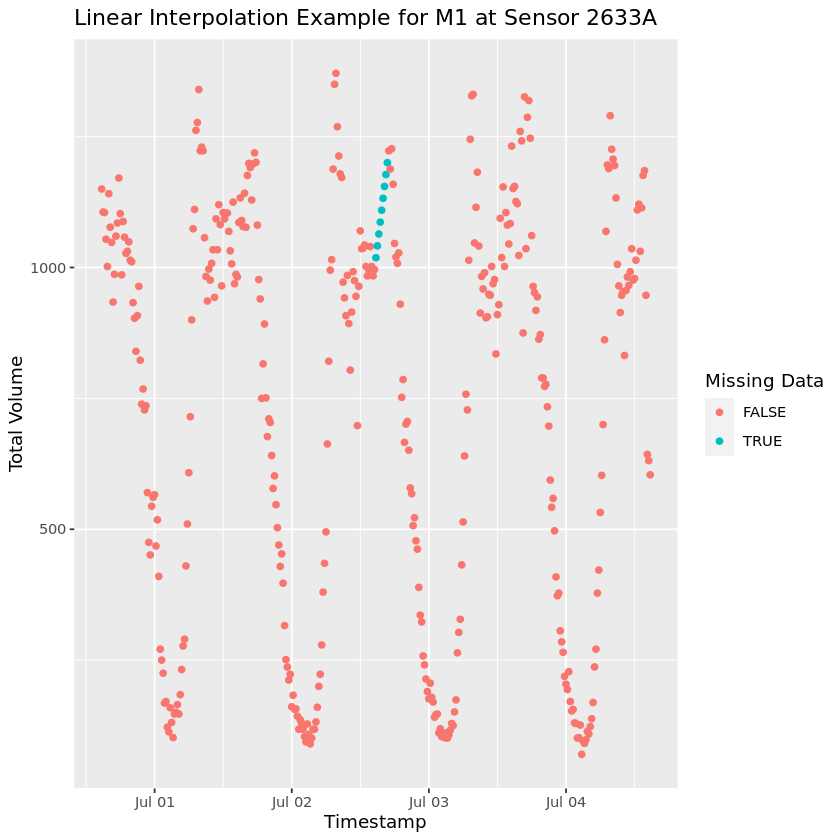

In [25]:
eng_lin_int

In [26]:
# Save the plot
ggsave("Results/EDA/eng_lin_inter.png", eng_lin_int, width=10, height=5)

### Manual Seasonal Interp

In [27]:
# Examine some of the missing values
head(england_sample %>% filter(missing_volume))

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume,rn,train_val_test
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<chr>
M1/2633A,4,2019-05-31,151,2019-05-31 14:44:00,58,37.00000,1195.0,TRUE,TRUE,1398,train
M1/2633A,4,2019-06-07,158,2019-06-07 22:14:00,88,60.50000,452.0,TRUE,TRUE,2100,train
M1/2633A,2,2019-06-26,177,2019-06-26 09:29:00,37,62.50000,951.0,TRUE,TRUE,3873,train
M1/2633A,1,2019-07-02,183,2019-07-02 14:44:00,58,60.92308,1018.7,TRUE,TRUE,4470,train
M1/2633A,1,2019-07-02,183,2019-07-02 14:59:00,59,61.15385,1041.4,TRUE,TRUE,4471,train
M1/2633A,1,2019-07-02,183,2019-07-02 15:14:00,60,61.38462,1064.1,TRUE,TRUE,4472,train


In [28]:
# Change the volume values to NULL where missing instead of the linear interpolated values
england_sample <- england_sample %>% mutate(vol = ifelse(missing_volume, NA, total_volume))

# Create an array of indexes for all missing values
eng_missing_vol_list <- which(england_sample$missing_volume==TRUE)

In [29]:
# Create an empty list for imputation values
eng_bf <- c()

# loop through the list of indexes for missing values
for (ind in eng_missing_vol_list) {

  # For each missing value, get the day of year and interval of day
  doy <- england_sample[ind, 4]$day_of_year
  iod <- england_sample[ind, 6]$interval_of_day
    
  # If the day of year is less than 15, create a list of the preceding 7 days 
  if (doy < 15) {
    doy_list <- c(doy-7, doy-6, doy-5, doy-4, doy-3, doy-2, doy-1)
  }
  
  # Else, create a list of the same day of week for the previous 7 weeks 
  # (not all of these may be available, but some will be)
  else {
    doy_list <- c(doy-49, doy-42, doy-35, doy-28, doy-21, doy-14, doy-7)
  }
  
  # Get the values that will be used for computing the imputed value  
  bf_values <- na.omit((england_sample %>% 
                  arrange(desc(timestamp)) %>% 
                  filter(day_of_year %in% doy_list) %>% 
                  filter(interval_of_day==iod))$vol)
  
  n <- length(bf_values)
  
#   weights <- n:1/(sum(1:n))
  
#   bf_value <- round(weighted.mean(bf_values, 
#                                   weights,
#                                   na.rm=T))
  
  # Compute the median of the values used for imputation  
  bf_value <- median(bf_values)  
    
  # Append the imputation values to the list  
  eng_bf <- c(eng_bf, bf_value)
}

In [30]:
# Replace missing values with the modified temporal medians imputated values
england_sample$vol <- replace(england_sample$vol, eng_missing_vol_list, eng_bf)

In [31]:
# Sanity check
head(england_sample %>% filter(missing_volume))

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume,rn,train_val_test,vol
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<chr>,<dbl>
M1/2633A,4,2019-05-31,151,2019-05-31 14:44:00,58,37.00000,1195.0,TRUE,TRUE,1398,train,1155.5
M1/2633A,4,2019-06-07,158,2019-06-07 22:14:00,88,60.50000,452.0,TRUE,TRUE,2100,train,563.0
M1/2633A,2,2019-06-26,177,2019-06-26 09:29:00,37,62.50000,951.0,TRUE,TRUE,3873,train,965.0
M1/2633A,1,2019-07-02,183,2019-07-02 14:44:00,58,60.92308,1018.7,TRUE,TRUE,4470,train,1121.5
M1/2633A,1,2019-07-02,183,2019-07-02 14:59:00,59,61.15385,1041.4,TRUE,TRUE,4471,train,1092.0
M1/2633A,1,2019-07-02,183,2019-07-02 15:14:00,60,61.38462,1064.1,TRUE,TRUE,4472,train,1125.5


In [32]:
# Plot the new imputed values
eng_man_int <- ggplot(england_sample[(4470-192):(4470+192), ]) + 
    geom_point(aes(x=timestamp, y=vol, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Temporal Medians Interpolation Example for {england_highway_name} at Sensor {england_sensor_name}"))

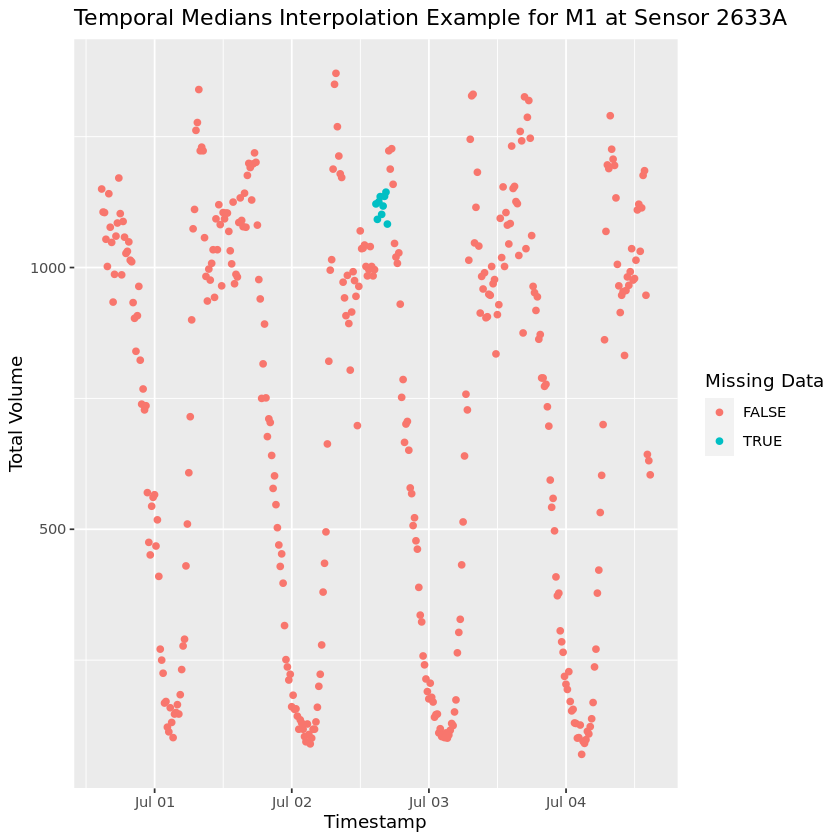

In [33]:
eng_man_int

In [34]:
# Save the plot
ggsave("Results/EDA/eng_man_inter.png", eng_man_int, width=10, height=5)

## Portland

In [35]:
# For Portland, follow the same steps as for England

In [36]:
which(portland_sample$missing_volume == TRUE)

[1] 1359 1378 1379 1380 1381 2372 2373 2375 2724 3079 3185 3186 3187 3188 3189
[16] 3190 3191 3192 3193 3194 3195 3738 6086

### Initial Linear Interpolation

In [37]:
port_lin_int <- ggplot(portland_sample[(3185-192):(3185+192), ]) + 
    geom_point(aes(x=timestamp, y=total_volume, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Linear Interpolation Example for {portland_highway_name} at Sensor {portland_sensor_name}"))

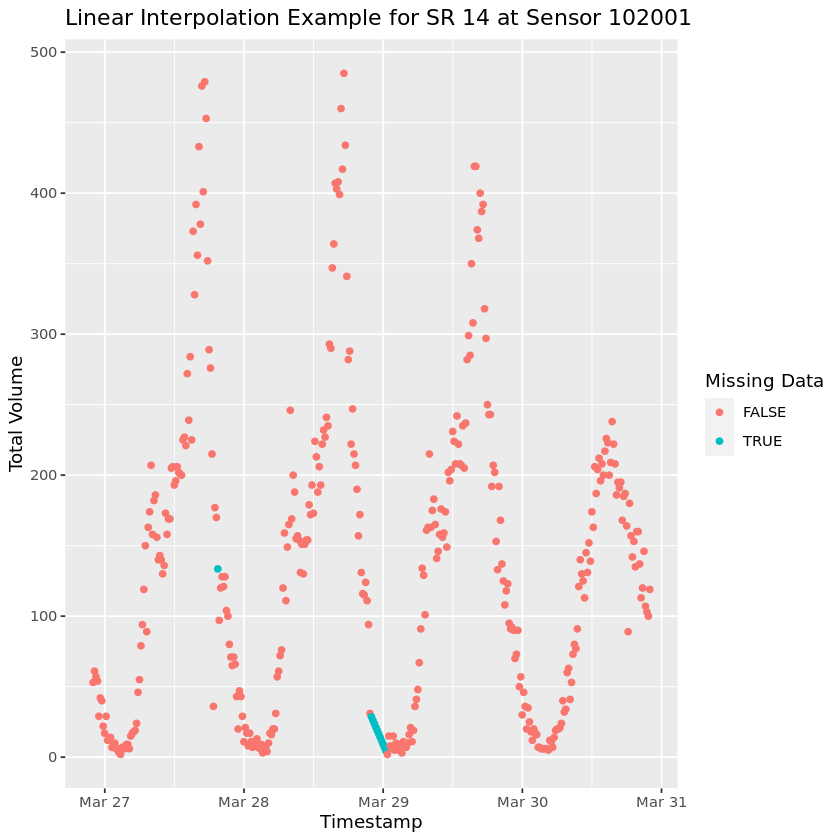

In [38]:
port_lin_int

In [39]:
ggsave("Results/EDA/port_lin_inter.png", port_lin_int, width=10, height=5)

### Manual Seasonal Interp

In [40]:
head(portland_sample %>% filter(missing_volume))

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume,rn,train_val_test
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<chr>
SR 14/102001,5,2019-03-09,68,2019-03-09 21:29:00,85,60.00000,23.0,TRUE,TRUE,1359,train
SR 14/102001,6,2019-03-10,69,2019-03-10 02:14:00,8,60.00000,17.8,TRUE,TRUE,1378,train
SR 14/102001,6,2019-03-10,69,2019-03-10 02:29:00,9,60.00000,20.6,TRUE,TRUE,1379,train
SR 14/102001,6,2019-03-10,69,2019-03-10 02:44:00,10,60.00000,23.4,TRUE,TRUE,1380,train
SR 14/102001,6,2019-03-10,69,2019-03-10 02:59:00,11,60.00000,26.2,TRUE,TRUE,1381,train
SR 14/102001,2,2019-03-20,79,2019-03-20 10:44:00,42,61.64667,34.0,TRUE,TRUE,2372,train


In [41]:
portland_sample <- portland_sample %>% mutate(vol = ifelse(missing_volume, NA, total_volume))

In [42]:
port_missing_vol_list <- which(portland_sample$missing_volume==TRUE)

In [43]:
port_bf <- c()
for (ind in port_missing_vol_list) {
  doy <- portland_sample[ind, 4]$day_of_year
  iod <- portland_sample[ind, 6]$interval_of_day
  if (doy < 15) {
    doy_list <- c(doy-7, doy-6, doy-5, doy-4, doy-3, doy-2, doy-1)
  }
  else {
    doy_list <- c(doy-49, doy-42, doy-35, doy-28, doy-21, doy-14, doy-7)
  }
  
  bf_values <- na.omit((portland_sample %>% 
                  arrange(desc(timestamp)) %>% 
                  filter(day_of_year %in% doy_list) %>% 
                  filter(interval_of_day==iod))$vol)
  
  n <- length(bf_values)
  
#   weights <- n:1/(sum(1:n))
  
#   bf_value <- round(weighted.mean(bf_values, 
#                                   weights,
#                                   na.rm=T))
    
  bf_value <- median(bf_values)
    
  port_bf <- c(port_bf, bf_value)
}

In [44]:
portland_sample$vol <- replace(portland_sample$vol, port_missing_vol_list, port_bf)

In [45]:
head(portland_sample %>% filter(missing_volume))

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume,rn,train_val_test,vol
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>,<int>,<chr>,<dbl>
SR 14/102001,5,2019-03-09,68,2019-03-09 21:29:00,85,60.00000,23.0,TRUE,TRUE,1359,train,126.0
SR 14/102001,6,2019-03-10,69,2019-03-10 02:14:00,8,60.00000,17.8,TRUE,TRUE,1378,train,17.5
SR 14/102001,6,2019-03-10,69,2019-03-10 02:29:00,9,60.00000,20.6,TRUE,TRUE,1379,train,11.0
SR 14/102001,6,2019-03-10,69,2019-03-10 02:44:00,10,60.00000,23.4,TRUE,TRUE,1380,train,7.0
SR 14/102001,6,2019-03-10,69,2019-03-10 02:59:00,11,60.00000,26.2,TRUE,TRUE,1381,train,4.0
SR 14/102001,2,2019-03-20,79,2019-03-20 10:44:00,42,61.64667,34.0,TRUE,TRUE,2372,train,159.0


In [46]:
port_man_int <- ggplot(portland_sample[(3185-192):(3185+192), ]) + 
    geom_point(aes(x=timestamp, y=vol, col=missing_volume)) + 
    labs(y="Total Volume", x="Timestamp", col="Missing Data") + 
    ggtitle(str_glue("Temporal Medians Interpolation Example for {portland_highway_name} at Sensor {portland_sensor_name}"))

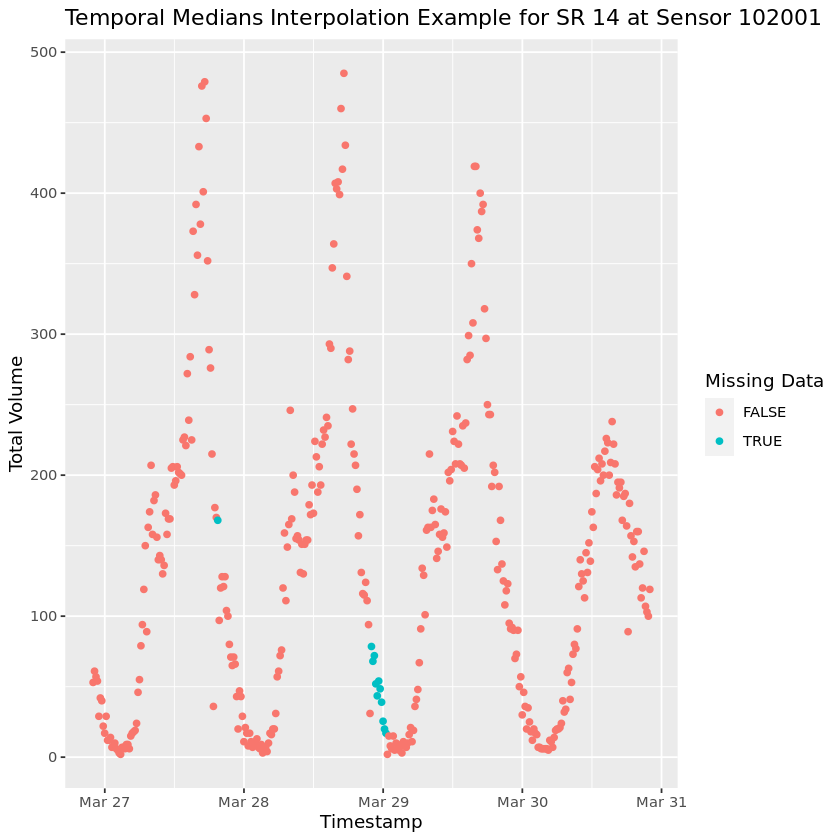

In [47]:
port_man_int

In [48]:
ggsave("Results/EDA/port_man_inter.png", port_man_int, width=10, height=5)

# Manual Seasonal Imputation Across Full Data Set

In [49]:
man_seas_int <- function(df) {
    # Based on the above results, it makes the most sense to proceed with the modified temporal medians
    # approach for imputation. In this function, we take in a data frame, find the missing values based
    # on a missing_volume boolean column, and impute them using the same modified temporal medians approach
    
    # Set volume where missing to NA
    df <- df %>% mutate(total_volume=ifelse(missing_volume, NA, total_volume))
    
    # Create the list of indexes with missing volume
    missing_vol_list <- which(df$missing_volume==TRUE)
    
    # Initialize an empty list for imputation
    bf <- c()
    
    # For each index
    for (ind in missing_vol_list) {
        
        # Grab the day of year and interval of day
        doy <- df[ind, 4]$day_of_year
        iod <- df[ind, 6]$interval_of_day
        
        # If the day of year is less than 15, grab the most recent 7 days
        if (doy < 15) {
            doy_list <- c(doy-7, doy-6, doy-5, doy-4, doy-3, doy-2, doy-1)
        }
        
        # Else, grab up to the most recent 7 weeks with the same day of week
        else {
            doy_list <- c(doy-49, doy-42, doy-35, doy-28, doy-21, doy-14, doy-7) 
        }
        
        # Get the volume values corresponding to the proper day of year(s) and interval of day
        bf_values <- na.omit((df %>% 
                              arrange(desc(timestamp)) %>% 
                              filter(day_of_year %in% doy_list) %>% 
                              filter(interval_of_day==iod))$total_volume)   
        
        n <- length(bf_values)
        
#         weights <- n:1/(sum(1:n))
        
#         bf_value <- round(weighted.mean(bf_values,
#                                         weights,
#                                         na.rm=T))

        # Compute the median of those volumes
        bf_value <- median(bf_values)
        
        # Append to list
        bf <- c(bf, bf_value)
    }    
    
    # Replace the missing volume values in the df with the imputed values
    df$total_volume <- replace(df$total_volume, missing_vol_list, bf)
    
    # Return the df with imputed values
    df
}

## England

In [50]:
# Impute each df in the england df list using the modified temporal medians method explored above
england_df_list_int <- lapply(england_df_list, man_seas_int)

### Explore Data Set Lengths to Look for Issues (Like Daylight Savings)

In [51]:
# Length should be 35040 - lengths slightly above this indicate daylight savings is causing multiple entries 
# for one timestamp
lapply(england_df_list_int, function(x) nrow(x))

[[1]]
[1] 35044

[[2]]
[1] 35044

[[3]]
[1] 35041

[[4]]
[1] 35041

[[5]]
[1] 35044

[[6]]
[1] 35044

[[7]]
[1] 35044

[[8]]
[1] 35044

[[9]]
[1] 35044

[[10]]
[1] 35044

[[11]]
[1] 35044

[[12]]
[1] 35044

[[13]]
[1] 35044

[[14]]
[1] 35044

[[15]]
[1] 35044

[[16]]
[1] 35044

[[17]]
[1] 35044

[[18]]
[1] 35044

[[19]]
[1] 35041

[[20]]
[1] 35041

[[21]]
[1] 35041

[[22]]
[1] 35041

[[23]]
[1] 35044

[[24]]
[1] 35044

[[25]]
[1] 35042

[[26]]
[1] 35043

[[27]]
[1] 35042

[[28]]
[1] 35042

[[29]]
[1] 35044

[[30]]
[1] 35044

[[31]]
[1] 35041

[[32]]
[1] 35044

[[33]]
[1] 35043

[[34]]
[1] 35041

[[35]]
[1] 35040

[[36]]
[1] 35043

[[37]]
[1] 35044

[[38]]
[1] 35044

In [52]:
# Check the max interval of day value - if there are none above 95, then we can simply groupby timestamp to
# eliminate daylight savings issues 
# When doing so, we will avg the speed and take the max of the total volume for that timestamp - this is abritrary
# and other methods could be used, but with so few data points, it is unlikely to matter
lapply(england_df_list_int, function(x) max(x$interval_of_day))

[[1]]
[1] 95

[[2]]
[1] 95

[[3]]
[1] 95

[[4]]
[1] 95

[[5]]
[1] 95

[[6]]
[1] 95

[[7]]
[1] 95

[[8]]
[1] 95

[[9]]
[1] 95

[[10]]
[1] 95

[[11]]
[1] 95

[[12]]
[1] 95

[[13]]
[1] 95

[[14]]
[1] 95

[[15]]
[1] 95

[[16]]
[1] 95

[[17]]
[1] 95

[[18]]
[1] 95

[[19]]
[1] 95

[[20]]
[1] 95

[[21]]
[1] 95

[[22]]
[1] 95

[[23]]
[1] 95

[[24]]
[1] 95

[[25]]
[1] 95

[[26]]
[1] 95

[[27]]
[1] 95

[[28]]
[1] 95

[[29]]
[1] 95

[[30]]
[1] 95

[[31]]
[1] 95

[[32]]
[1] 95

[[33]]
[1] 95

[[34]]
[1] 95

[[35]]
[1] 95

[[36]]
[1] 95

[[37]]
[1] 95

[[38]]
[1] 95

In [53]:
# The timsteamps with issues indicate daylight savings is the likely culprit
lapply(england_df_list_int, function(x) (x %>%  
                                         group_by(timestamp) %>% 
                                         summarise(n=n()) %>% 
                                         ungroup() %>%
                                         arrange(desc(n)) %>%
                                         filter(n>1))$timestamp)

[[1]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[2]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[3]]
[1] "2019-10-27 01:59:00 UTC"

[[4]]
[1] "2019-10-27 01:59:00 UTC"

[[5]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[6]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[7]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[8]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[9]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" "2019-10-27 01:59:00 UTC"

[[10]]
[1] "2019-10-27 01:14:00 UTC" "2019-10-27 01:29:00 UTC"
[3] "2019-10-27 01:44:00 UTC" 

In [54]:
# For each data frame, deal with daylight savings issues by computing the max volume of the duplicate start times
england_df_list_int <- lapply(england_df_list_int, 
                              function(x) x <- x %>% 
                                                group_by(site_name, 
                                                         day_of_week, 
                                                         date, 
                                                         day_of_year, 
                                                         timestamp, 
                                                         interval_of_day
                                                        ) %>%
                                                summarise(avg_mph=mean(avg_mph),
                                                          total_volume=max(total_volume),
                                                          missing_speed=max(missing_speed),
                                                          missing_volume=max(missing_volume)
                                                         ) %>%
                                               ungroup() %>%
                                               mutate(missing_speed=ifelse(missing_speed==1, TRUE, FALSE),
                                                      missing_volume=ifelse(missing_volume==1, TRUE, FALSE)
                                                     ))

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override u

In [55]:
# Check lengths again - if they are all 35040, we can write to file
lapply(england_df_list_int, function(x) nrow(x))

[[1]]
[1] 35040

[[2]]
[1] 35040

[[3]]
[1] 35040

[[4]]
[1] 35040

[[5]]
[1] 35040

[[6]]
[1] 35040

[[7]]
[1] 35040

[[8]]
[1] 35040

[[9]]
[1] 35040

[[10]]
[1] 35040

[[11]]
[1] 35040

[[12]]
[1] 35040

[[13]]
[1] 35040

[[14]]
[1] 35040

[[15]]
[1] 35040

[[16]]
[1] 35040

[[17]]
[1] 35040

[[18]]
[1] 35040

[[19]]
[1] 35040

[[20]]
[1] 35040

[[21]]
[1] 35040

[[22]]
[1] 35040

[[23]]
[1] 35040

[[24]]
[1] 35040

[[25]]
[1] 35040

[[26]]
[1] 35040

[[27]]
[1] 35040

[[28]]
[1] 35040

[[29]]
[1] 35040

[[30]]
[1] 35040

[[31]]
[1] 35040

[[32]]
[1] 35040

[[33]]
[1] 35040

[[34]]
[1] 35040

[[35]]
[1] 35040

[[36]]
[1] 35040

[[37]]
[1] 35040

[[38]]
[1] 35040

### Write to Files

In [56]:
# Write each sensor to a file in the Processed sub-folder of the Data directory
for (i in 1:length(england_df_list_int)) {
    write.csv(england_df_list_int[[i]], 
              str_replace_all(england_fnames[[i]], "Intermediate", "Processed"),
              row.names=FALSE)
}

## Portland

In [57]:
# Impute
portland_df_list_int <- lapply(portland_df_list, man_seas_int)

### Explore Data Set Length

In [58]:
# These lengths are all the same, possibly indicating an issue with daylight savings?
lapply(portland_df_list_int, function(x) nrow(x))

[[1]]
[1] 35041

[[2]]
[1] 35041

[[3]]
[1] 35041

[[4]]
[1] 35041

[[5]]
[1] 35041

[[6]]
[1] 35041

[[7]]
[1] 35041

[[8]]
[1] 35041

[[9]]
[1] 35041

[[10]]
[1] 35041

[[11]]
[1] 35066

[[12]]
[1] 35040

[[13]]
[1] 35041

[[14]]
[1] 35045

[[15]]
[1] 35045

[[16]]
[1] 35040

[[17]]
[1] 35040

[[18]]
[1] 35041

[[19]]
[1] 35041

In [59]:
# The timsteamps with issues indicate daylight savings is the culprit
lapply(portland_df_list_int, function(x) (x %>%  
                                          group_by(timestamp) %>% 
                                          summarise(n=n()) %>% 
                                          ungroup() %>%
                                          arrange(desc(n)) %>%
                                          filter(n>1))$timestamp)

[[1]]
[1] "2019-11-03 01:59:00 UTC"

[[2]]
[1] "2019-11-03 01:59:00 UTC"

[[3]]
[1] "2019-11-03 01:59:00 UTC"

[[4]]
[1] "2019-11-03 01:59:00 UTC"

[[5]]
[1] "2019-11-03 01:59:00 UTC"

[[6]]
[1] "2019-11-03 01:59:00 UTC"

[[7]]
[1] "2019-11-03 01:59:00 UTC"

[[8]]
[1] "2019-11-03 01:59:00 UTC"

[[9]]
[1] "2019-11-03 01:59:00 UTC"

[[10]]
[1] "2019-11-03 01:59:00 UTC"

[[11]]
 [1] "2019-01-15 00:14:00 UTC" "2019-01-25 00:14:00 UTC"
 [3] "2019-01-31 00:14:00 UTC" "2019-02-20 00:14:00 UTC"
 [5] "2019-04-01 00:14:00 UTC" "2019-04-05 00:14:00 UTC"
 [7] "2019-04-15 00:14:00 UTC" "2019-04-20 00:14:00 UTC"
 [9] "2019-04-30 00:14:00 UTC" "2019-05-20 00:14:00 UTC"
[11] "2019-05-25 00:14:00 UTC" "2019-05-31 00:14:00 UTC"
[13] "2019-06-10 00:14:00 UTC" "2019-06-20 00:14:00 UTC"
[15] "2019-07-01 00:14:00 UTC" "2019-07-05 00:14:00 UTC"
[17] "2019-07-20 00:14:00 UTC" "2019-08-05 00:14:00 UTC"
[19] "2019-08-15 00:14:00 UTC" "2019-10-10 00:14:00 UTC"
[21] "2019-10-15 00:14:00 UTC" "2019-11-01 00:14:00 

In [60]:
# The max iod of 95 indicates we can use a similar procedure to that used for England to de-dupe these timestamps
lapply(portland_df_list_int, function(x) max(x$interval_of_day))

[[1]]
[1] 95

[[2]]
[1] 95

[[3]]
[1] 95

[[4]]
[1] 95

[[5]]
[1] 95

[[6]]
[1] 95

[[7]]
[1] 95

[[8]]
[1] 95

[[9]]
[1] 95

[[10]]
[1] 95

[[11]]
[1] 95

[[12]]
[1] 95

[[13]]
[1] 95

[[14]]
[1] 95

[[15]]
[1] 95

[[16]]
[1] 95

[[17]]
[1] 95

[[18]]
[1] 95

[[19]]
[1] 95

In [61]:
# Yes, we will use a similar approach to England, where we take the max of the volume to de-dupe these times
lapply(portland_df_list_int, function(x) (x %>%  
                                          filter(timestamp=='2019-11-03 01:59:00')))

site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
I205/101068,6,2019-11-03,307,2019-11-03 01:59:00,7,62.75,4,FALSE,FALSE
I205/101068,6,2019-11-03,307,2019-11-03 01:59:00,7,61.75,4,FALSE,FALSE
site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
I205/101073,6,2019-11-03,307,2019-11-03 01:59:00,7,65.00,0,TRUE,FALSE
I205/101073,6,2019-11-03,307,2019-11-03 01:59:00,7,61.67,3,FALSE,FALSE
site_name,day_of_week,date,day_of_year,timestamp,interval_of_day,avg_mph,total_volume,missing_speed,missing_volume
<chr>,<dbl>,<date>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
I405/100395,6,2019-11-03,307,2019-11-03 01:59:00,7,63.0,1,FALSE,FALSE


In [62]:
# Use same approach as with england to handle daylight savings
portland_df_list_int <- lapply(portland_df_list_int, 
                              function(x) x <- x %>% 
                                                group_by(site_name, 
                                                         day_of_week, 
                                                         date, 
                                                         day_of_year, 
                                                         timestamp, 
                                                         interval_of_day
                                                        ) %>%
                                                summarise(avg_mph=mean(avg_mph),
                                                          total_volume=max(total_volume),
                                                          missing_speed=max(missing_speed),
                                                          missing_volume=max(missing_volume)
                                                         ) %>%
                                               ungroup() %>%
                                               mutate(missing_speed=ifelse(missing_speed==1, TRUE, FALSE),
                                                      missing_volume=ifelse(missing_volume==1, TRUE, FALSE)
                                                     ))

`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year', 'timestamp'. You can override u

In [63]:
# Check lengths again - if they are all 35040, we can write to file
lapply(portland_df_list_int, function(x) nrow(x))

[[1]]
[1] 35040

[[2]]
[1] 35040

[[3]]
[1] 35040

[[4]]
[1] 35040

[[5]]
[1] 35040

[[6]]
[1] 35040

[[7]]
[1] 35040

[[8]]
[1] 35040

[[9]]
[1] 35040

[[10]]
[1] 35040

[[11]]
[1] 35040

[[12]]
[1] 35040

[[13]]
[1] 35040

[[14]]
[1] 35040

[[15]]
[1] 35040

[[16]]
[1] 35040

[[17]]
[1] 35040

[[18]]
[1] 35040

[[19]]
[1] 35040

### Write to File

In [64]:
# Again, write to the processed directory
for (i in 1:length(portland_df_list_int)) {
    write.csv(portland_df_list_int[[i]], 
              str_replace_all(portland_fnames[[i]], "Intermediate", "Processed"), 
              row.names=FALSE)
}

## Utah

In [65]:
# Impute 5-min aggregated data
utah_df_list_int <- lapply(utah_df_list, man_seas_int)

In [66]:
# Aggregated to 15 minutes
utah_df_list_int_15 <- lapply(utah_df_list_int, 
                              function(x) x <- x %>% mutate(min_15_int = floor(interval_of_day/3)) %>%
                                                   group_by(site_name, 
                                                            day_of_week, 
                                                            date, 
                                                            day_of_year, 
                                                            min_15_int) %>%
                                                   summarise(timestamp=max(timestamp),
                                                             total_volume=sum(total_volume),
                                                             avg_mph=mean(avg_mph),
                                                             missing_speed=max(missing_speed),
                                                             missing_volume=max(missing_volume)
                                                            ) %>%
                                                   ungroup() %>%
                                                   select(site_name,
                                                          day_of_week,
                                                          date,
                                                          day_of_year,
                                                          timestamp,
                                                          interval_of_day=min_15_int,
                                                          avg_mph,
                                                          total_volume,
                                                          missing_speed,
                                                          missing_volume
                                                         ) %>%
                                                    mutate(missing_speed=ifelse(missing_speed==1, TRUE, FALSE),
                                                           missing_volume=ifelse(missing_volume==1, TRUE, FALSE)
                                                          )
                          )


`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week', 'date',
'day_of_year'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'site_name', 'day_of_week'

### Explore Data Set Length

In [67]:
# Check df lengths - if they are all 35040, we can write to file
lapply(utah_df_list_int_15, function(x) nrow(x))

[[1]]
[1] 35040

[[2]]
[1] 35040

[[3]]
[1] 35040

[[4]]
[1] 35040

[[5]]
[1] 35040

[[6]]
[1] 35040

[[7]]
[1] 35040

[[8]]
[1] 35040

[[9]]
[1] 35040

[[10]]
[1] 35040

[[11]]
[1] 35040

[[12]]
[1] 35040

[[13]]
[1] 35040

[[14]]
[1] 35040

[[15]]
[1] 35040

[[16]]
[1] 35040

[[17]]
[1] 35040

[[18]]
[1] 35040

[[19]]
[1] 35040

### Write to File

In [68]:
# Write to Processed folder
for (i in 1:length(utah_df_list_int_15)) {
    write.csv(utah_df_list_int_15[[i]], 
              str_replace_all(utah_fnames[[i]], "Intermediate", "Processed"), 
              row.names=FALSE)
}